# Chapter 11: Training Deep Neural Networks

## Problem 1

Is it OK to initialize all the weights to the same value as long as that value is selected randomly using He initialization?

No, if all weights in a layer are the same, then gradient-based learning will update all in the same increments, i.e. the weights will always remain the same. The initial values need to be randomized to make learning possible.

## Problem 2

Is it OK to initialize the bias terms to 0?

Yes, it is fine to initialize the bias term to 0. There is only one per bias per layer (per input variable).

## Problem 3

Name three advantages of the SELU activation function over ReLU.

1. It can take negative values, so the average value of outputs is closer to zero. This helps with the vanishing gradient problem
2. It has a non-zero derivative.
3. Under the right condition, it can be self-regulating (which solves the vanishing gradient problem).

## Problem 4

In which cases would you want to use each of the following activation functions:
SELU, leaky ReLU (and its variants), ReLU, tanh, logistic, and softmax?

* SELU is a good default
* If speed is important, leaky ReLU is preferable
* ReLU is almost always outperformed by leaky ReLU or SELU. But, it can benefit from optimized implementation. Also, the fact that it outputs exactly zero can be ueful for optimized implementations.
* Tanh, logistic, and softmax are almost never used for hidden layers. Only for output layers.

## Problem 5

What may happen if you set the momentum hyperparameter too close to 1 (e.g., 0.99999) when using an SGD optimizer?

If momentum is large, the algorithm will pick up a lot of speed and overshoot any minimum. Too high momentum therefore slows down convergence

## Problem 6

Name three ways you can produce a sparse model.

* Set small weights to zero
* L1-regularization
* Tensorflow Model Optimization Toolkit

## Problem 7

Does dropout slow down training? Does it slow down inference (i.e., making
predictions on new instances)? What about MC Dropout?

* Dropout slows down training. It has not effect on inference.
* MC Dropout slows down training and inference.

## Problem 8

Practice training a deep neural network on the CIFAR10 image dataset:

###a

Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but
it’s the point of this exercise). Use He initialization and the ELU activation
function.

In [66]:
import matplotlib.pyplot as plt
from tensorflow import keras

In [67]:
model_a = keras.models.Sequential([keras.layers.Flatten(input_shape=(32, 32, 3))])
for i in range(20):
    model_a.add(keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'))
model_a.add(keras.layers.Dense(10, activation='softmax'))

###b

Using Nadam optimization and early stopping, train the network on the
CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_
data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000
for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output
layer with 10 neurons. Remember to search for the right learning rate each
time you change the model’s architecture or hyperparameters.

In [68]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [69]:
# Search for optimal learning rate

In [70]:
K = keras.backend
class LearningRateSearcher(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.learning_rate = []
        self.loss = []
    def on_batch_end(self, batch, logs):
        self.learning_rate.append(K.get_value(self.model.optimizer.lr))
        self.loss.append(logs['loss'])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)
    def plot(self):
        plt.plot(self.learning_rate, self.loss)
        plt.yscale('log')
        axes = plt.gca()
        axes.set_ylim([min(self.loss), self.loss[0]])
        plt.plot()
    

In [71]:
model_a.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

In [72]:
lr_search = LearningRateSearcher(factor=1.002)

In [73]:
model_a.fit(X_train, y_train, epochs=1, callbacks=[lr_search])

1563/1563 [==============================] - 10s 6ms/step - loss: 18673150459904.0000


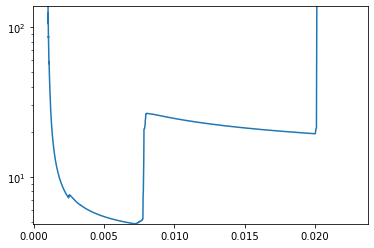

In [74]:
lr_search.plot()

In [75]:
opt_lr = 0.00075

In [76]:
# Recreate model and train

In [81]:
model_a = keras.models.Sequential([keras.layers.Flatten(input_shape=(32, 32, 3))])
for i in range(20):
    model_a.add(keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'))
model_a.add(keras.layers.Dense(10, activation='softmax'))

In [82]:
model_a.compile(optimizer=keras.optimizers.Nadam(learning_rate=opt_lr), loss='sparse_categorical_crossentropy')

In [83]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_cb = keras.callbacks.ModelCheckpoint('./models/ch11/model_b.h5', save_best_only=True)

In [84]:
history_a = model_a.fit(X_train, y_train, epochs=100, callbacks=[early_stopping_cb, model_cb], validation_data=(X_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 9s 6ms/step - loss: 2.9394 - val_loss: 1.9884
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9153 - val_loss: 1.8651
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8603 - val_loss: 1.8179
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8298 - val_loss: 1.7841
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7912 - val_loss: 1.7959
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7556 - val_loss: 1.6685
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7182 - val_loss: 1.7227
Epoch 8/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7934 - val_loss: 1.6793
Epoch 9/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6894 - val_loss: 1.7013
Epoch 10/100
1563/1563 [==============================] - 9s 6ms/step - l

In [87]:
model_b = keras.models.load_model('./models/ch11/model_b.h5')

In [88]:
model_b.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5831


1.5831236839294434

In [ ]:
###c

In [ ]:
Now try adding Batch Normalization and compare the learning curves: Is it
converging faster than before? Does it produce a better model? How does it
affect training speed?

In [ ]:
###d

In [ ]:
Try replacing Batch Normalization with SELU, and make the necessary adjustements
to ensure the network self-normalizes (i.e., standardize the input features,
use LeCun normal initialization, make sure the DNN contains only a
sequence of dense layers, etc.).

In [ ]:
### e

In [ ]:
Try regularizing the model with alpha dropout. Then, without retraining your
model, see if you can achieve better accuracy using MC Dropout.

### f

Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.